# Linear Regression in TensorFlow

This example is refactored from https://www.tensorflow.org/guide/eager. We create a complete example of using linear regression to predict the paramters of the function 

$$y = f(x) + noise = 3 x + 2 + noise$$

Given a point $x$ we want to predict the value of $f(x)$. We train the model on 100 data pairs $(x,y)$. 

We want the model to learn a linear model 

$$\hat{y} = W x + b$$

Note that, we use `tf.GradientTape` to record the gradient of the loss function with respect our model paramters.  

We use MSE to calcuate the loss 

$$MSE = \frac{1}{100} (y-\hat{y})^2$$

We use Gradient Descent to update the paramters 

$$W = W - \alpha  \frac{\partial MSE}{\partial W}$$

$$b = b - \alpha  \frac{\partial MSE}{\partial b}$$

In [3]:
import tensorflow as tf

from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
X, y = make_regression(n_samples=100, n_features=5, random_state=42, noise=5)
X = tf.constant(X, dtype=np.float64)
y = tf.constant(y.reshape(-1, 1), dtype=np.float64)

In [12]:
X.shape, y.shape

(TensorShape([100, 5]), TensorShape([100, 1]))

In [13]:
ones = tf.ones((X.shape[0], 1), dtype=np.float64)

X_mod = tf.concat([ones, X], axis=1)

In [14]:
X_mod.shape

TensorShape([100, 6])

# Contruction Phase

In [37]:
#create model paramters with initial values 
theta = tf.Variable(tf.zeros([X_mod.shape[1], 1], dtype=np.float64))

In [38]:
#training info
train_steps = 300
learning_rate = 0.01

In [39]:

#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = tf.matmul(X, theta)

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(error**2)

    #evalute the gradient with the respect to the paramters
    dt = tape.gradient(loss, theta)

    #update the paramters using Gradient Descent  
    theta.assign_sub(dt * learning_rate)

    return(loss)

In [40]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X_mod, y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
        


Loss at step 000: 19572.965
Loss at step 020: 9198.172
Loss at step 040: 4510.213
Loss at step 060: 2299.425
Loss at step 080: 1213.970
Loss at step 100: 661.664
Loss at step 120: 372.071
Loss at step 140: 216.491
Loss at step 160: 131.289
Loss at step 180: 83.926
Loss at step 200: 57.289
Loss at step 220: 42.173
Loss at step 240: 33.532
Loss at step 260: 28.565
Loss at step 280: 25.696


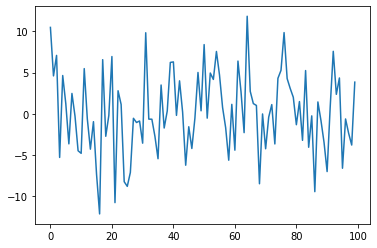

In [41]:
plt.plot(tf.matmul(X_mod, theta) - y)

ValueError: x and y must be the same size

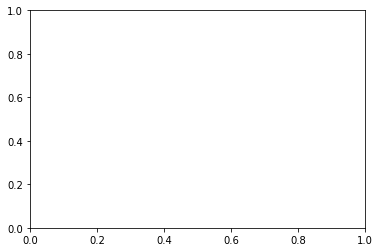

In [42]:
plt.scatter(X, y)
plt.plot(X, b+W*X, color='red')